Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4417 - loss: 1.2747 - val_accuracy: 0.6350 - val_loss: 0.8924
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6398 - loss: 0.8891 - val_accuracy: 0.6350 - val_loss: 0.8097
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6005 - loss: 0.8495 - val_accuracy: 0.6350 - val_loss: 0.7541
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6493 - loss: 0.7969 - val_accuracy: 0.6550 - val_loss: 0.7142
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6418 - loss: 0.7692 - val_accuracy: 0.6600 - val_loss: 0.6834
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6362 - loss: 0.7490 - val_accuracy: 0.6750 - val_loss: 0.6587
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6758 - loss: 0.6853 - val_accuracy: 0.6650 - val_loss: 0.6364
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6619 - loss: 0.6649 - val_accuracy: 0.7000 - val_loss: 0.6149
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Previsão: 1, Real: 1
Previsão: 1, Real: 1
Previsão: 1, Real: 1
Previsão: 1, Real: 1
Previsão: 1, Real: 1


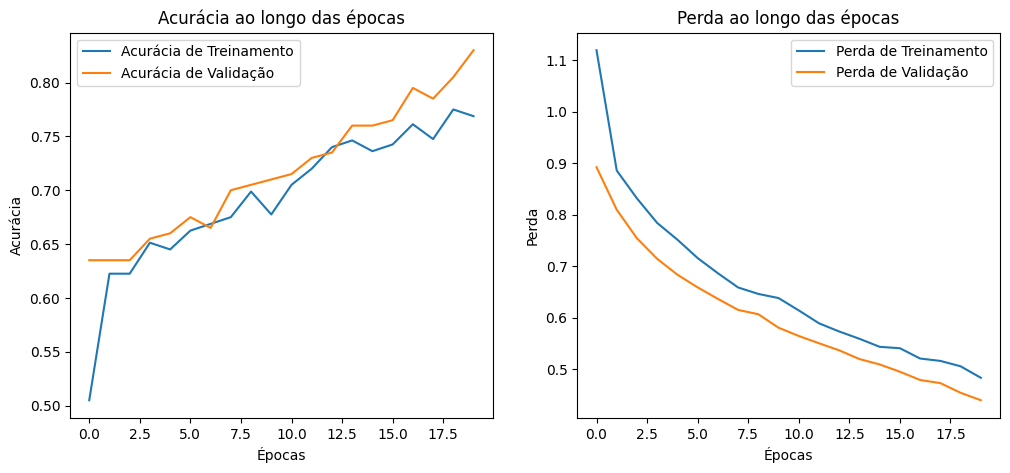

In [13]:
# Importar as blibiotecas
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Carregar os dados do CSV
data = pd.read_csv('medicoes/cores_coletadas.csv')

# Separar características e rótulos
X = data[['uniformidade_cor', 'brilho', 'adesao']].values
y = data['qualidade_geral'].values

# Carregar os dados MNIST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converter os rótulos para uma representação categórica
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

# Construir o modelo MLP
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(3,)),  # Camada oculta com 128 neurônios e função de ativação ReLU
    tf.keras.layers.Dropout(0.2),  # Camada Dropout para evitar overfitting
    tf.keras.layers.Dense(3, activation='softmax')  # Camada de saída com 3 neurônios para 3 classes
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Avaliar o modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nPrecisão no conjunto de teste: {test_acc}')

# Fazer previsões
predictions = model.predict(X_test)

# Visualizar algumas previsões
for i in range(5):
    print(f"Previsão: {predictions[i].argmax()}, Real: {y_test[i].argmax()}")

# Plotando a precisão e a perda ao longo das épocas
plt.figure(figsize=(12, 5))

# Plot da Precisão
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia ao longo das épocas')

# Plot da Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda ao longo das épocas')

plt.show()

